In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%gui qt

In [4]:
from spiketag.base import mua_kernel as kernel

/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


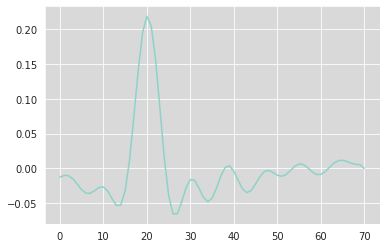

In [8]:
plot(kernel)

In [9]:
kernel.dtype

dtype('float32')

In [10]:
k = kernel.astype(np.float16)

In [11]:
sum(k - kernel)

0.00015337009

## deconvolve single channel (make sure the fs=25000.)

In [12]:
from spiketag.base.Binload import _deconvolve
from spiketag.base import bload

In [13]:
bf = bload(nCh=3, fs=25000.)

In [17]:
folder = '/disk0/Work/pydev/spiketag/demo/GT/'
bf.load(folder+'cell_0109_mua_25000Hz.bin', dtype='float32')

2019-10-17 16:51:32,788 - spiketag - INFO - #############  load data  ###################
2019-10-17 16:51:32,789 - spiketag - INFO - /disk0/Work/pydev/spiketag/demo/GT/cell_0109_mua_25000Hz.bin loaded, it contains: 
2019-10-17 16:51:32,790 - spiketag - INFO - 11600119.0 * 3 points (139201428 bytes) 
2019-10-17 16:51:32,791 - spiketag - INFO - 3 channels with sampling rate of 25000.0000 
2019-10-17 16:51:32,792 - spiketag - INFO - 464.005 secs (7.733 mins) of data
2019-10-17 16:51:32,793 - spiketag - INFO - #############################################


In [18]:
def _deconvolve(signal, kernel):
    _h = fft(kernel)
    length = len(signal) - len(kernel) + 1
    kernel = np.hstack((kernel, np.zeros(len(signal) - len(kernel), dtype=np.float32))) # zero pad the kernel to same length
    H = fft(kernel)
    deconvolved = ifft(fft(signal.astype(np.float32))*np.conj(H)/(H*np.conj(H)))
    return deconvolved[:length]

In [19]:
from spiketag.base.Binload import fft, ifft

In [20]:
data = bf.data.numpy().reshape(-1,3)//(2**3)
data.shape

(11600119, 3)

In [21]:
signal = data[:,0].astype(np.float16)

In [22]:
length = len(signal) - len(kernel) + 1

In [23]:
signal = np.hstack((signal, np.zeros((2**24-len(signal),)).astype(np.float16)))

In [24]:
_kernel = np.hstack((k, np.zeros(len(signal) - len(k), dtype=np.float16)))

In [25]:
_kernel

array([-0.012764, -0.01006 , -0.010605, ...,  0.      ,  0.      ,
        0.      ], dtype=float16)

In [26]:
H = fft(_kernel)

RuntimeError: MKL FFT doesn't support tensor of type: Half

In [19]:
H

array([0.00100708+0.0000000e+00j, 0.00072479-5.3405762e-05j,
       0.00072479-5.3405762e-05j, ..., 0.00072479-7.6293945e-06j,
       0.00072479+5.3405762e-05j, 0.00072479+5.3405762e-05j],
      dtype=complex64)

In [20]:
_deconvolved_16 = ifft(fft(signal.astype(np.float32))*np.conj(H)/(H*np.conj(H)))

In [26]:
deconvolved = ifft(fft(signal.astype(np.float32))*np.conj(H)/(H*np.conj(H)))

In [100]:
_deconvolved_16.shape

torch.Size([16777216])

In [101]:
deconvolved.shape

torch.Size([11600119])

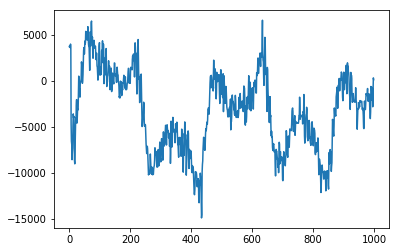

In [40]:
plot(_deconvolved_16[:1000])

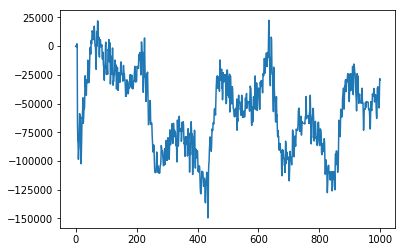

In [98]:
plot(deconvolved[:1000])

In [8]:
data = bf.data.numpy().reshape(-1,3)
x = data[:,2]

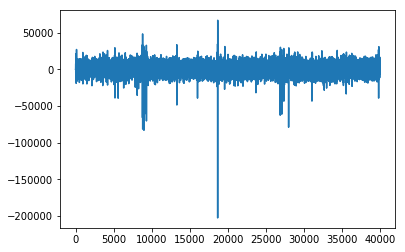

In [9]:
plot(x[:40000])

In [11]:
y = _deconvolve(x, kernel)

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

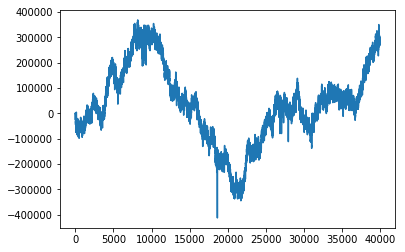

In [11]:
plot(y[:40000])

## deconvolve the whole binary file (make sure the fs=25000.)

In [6]:
bf = bload(nCh=3, fs=25000.)

In [7]:
bf.load('./cell_0109_mua_25000Hz.bin', dtype='float32')

2019-03-17 21:58:04,398 - spiketag - INFO - #############  load data  ###################
2019-03-17 21:58:04,399 - spiketag - INFO - ./cell_0109_mua_25000Hz.bin loaded, it contains: 
2019-03-17 21:58:04,401 - spiketag - INFO - 11600119.0 * 3 points (139201428 bytes) 
2019-03-17 21:58:04,402 - spiketag - INFO - 3 channels with sampling rate of 25000.0000 
2019-03-17 21:58:04,403 - spiketag - INFO - 464.005 secs (7.733 mins) of data
2019-03-17 21:58:04,404 - spiketag - INFO - #############################################


In [8]:
bf.deconvolve(kernel)

deconvolve 0th channel
deconvolve 1th channel
deconvolve 2th channel


In [9]:
bf.show()

In [15]:
type(bf.data)

numpy.ndarray

In [22]:
datatype = np.int32

In [23]:
data = bf.data.astype(datatype)

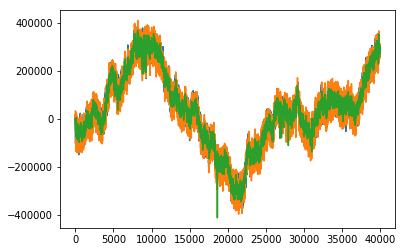

In [24]:
plot(data[:40000])

In [25]:
data.dtype

dtype('int32')